In [85]:
import pandas as pd
import argparse
from collections import defaultdict
import copy

import matplotlib.pyplot as plt
import numpy as np
import torch
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [10]:
df = pd.read_csv('data/labels.csv', sep=';')

In [6]:
predicted_labels = [89, 86, 208, 52, 49, 17, 134, 40, 74, 52, 188, 125, 215, 3]
true_labels = [89, 86, 208, 52, 49, 17, 134, 40, 74, 52, 188, 125, 215, 3]


In [100]:

df = pd.read_csv('data/labels.csv', sep=';')
dict_language_codes = df.reset_index().set_index('English').to_dict()['index']

language_groups = dict()
cyrillic_list = df[df['Writing system']=='Cyrillic']['English'].to_list()
sino_tibetan_list = df[df['Language family']=='Sino-Tibetan']['English'].to_list()
west_germanic_list = ['Afrikaans', 'Dutch', 'English', 'German', 'Western Frisian', 'Yiddish']
old_norse_list = ['Danish', 'Faroese', 'Icelandic', 'Norwegian Nynorsk', 'Swedish']

cyrillic_mapping = defaultdict(lambda:len(cyrillic_list))
for i, language in enumerate(cyrillic_list):
    cyrillic_mapping[dict_language_codes[language]] = i
sino_tibetan_mapping = defaultdict(lambda:len(sino_tibetan_list))
for i, language in enumerate(sino_tibetan_list):
    sino_tibetan_mapping[dict_language_codes[language]] = i
west_germanic_mapping = defaultdict(lambda:len(west_germanic_list))
for i, language in enumerate(west_germanic_list):
    west_germanic_mapping[dict_language_codes[language]] = i
old_norse_mapping = defaultdict(lambda:len(old_norse_list))
for i, language in enumerate(old_norse_list):
    old_norse_mapping[dict_language_codes[language]] = i

language_groups['Cyrllic'] = {'list': cyrillic_list, 'mapping_dict':cyrillic_mapping}
language_groups['Sino Tibetan'] = {'list': sino_tibetan_list, 'mapping_dict':sino_tibetan_mapping}
language_groups['West Germanic'] = {'list': west_germanic_list, 'mapping_dict':west_germanic_mapping}
language_groups['Old Norse'] = {'list': old_norse_list, 'mapping_dict':old_norse_mapping}

language_groups


{'Cyrllic': {'list': ['Moksha', 'Russian', 'Tuvan', 'Ukrainian'],
  'mapping_dict': defaultdict(<function __main__.<lambda>()>,
              {128: 0, 177: 1, 212: 2, 215: 3})},
 'Sino Tibetan': {'list': ['Tibetan',
   'Min Dong',
   'Hakka Chinese',
   'Literary Chinese',
   'Burmese',
   'Min Nan Chinese',
   'Newari',
   'Wu Chinese',
   'Cantonese',
   'Standard Chinese'],
  'mapping_dict': defaultdict(<function __main__.<lambda>()>,
              {22: 0,
               30: 1,
               70: 2,
               123: 3,
               139: 4,
               142: 5,
               149: 6,
               227: 7,
               233: 8,
               234: 9})},
 'West Germanic': {'list': ['Afrikaans',
   'Dutch',
   'English',
   'German',
   'Western Frisian',
   'Yiddish'],
  'mapping_dict': defaultdict(<function __main__.<lambda>()>,
              {1: 0, 150: 1, 50: 2, 43: 3, 60: 4, 230: 5})},
 'Old Norse': {'list': ['Danish',
   'Faroese',
   'Icelandic',
   'Norwegian Nynorsk',


[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4]


<Figure size 1000x800 with 0 Axes>

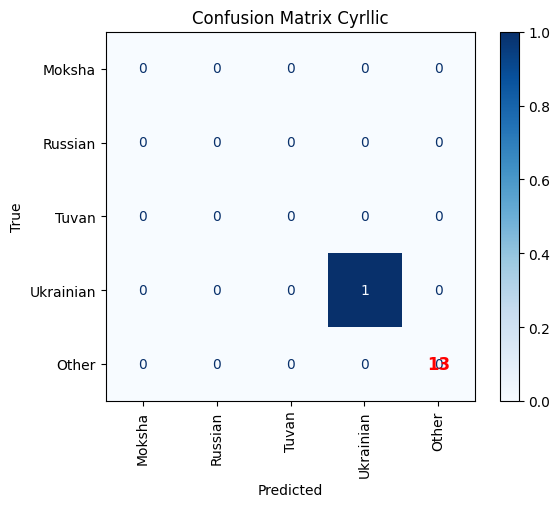

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


<Figure size 1000x800 with 0 Axes>

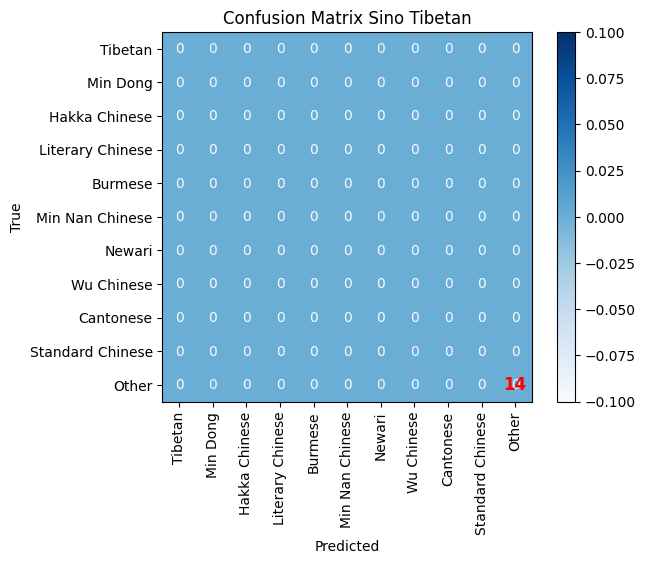

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


<Figure size 1000x800 with 0 Axes>

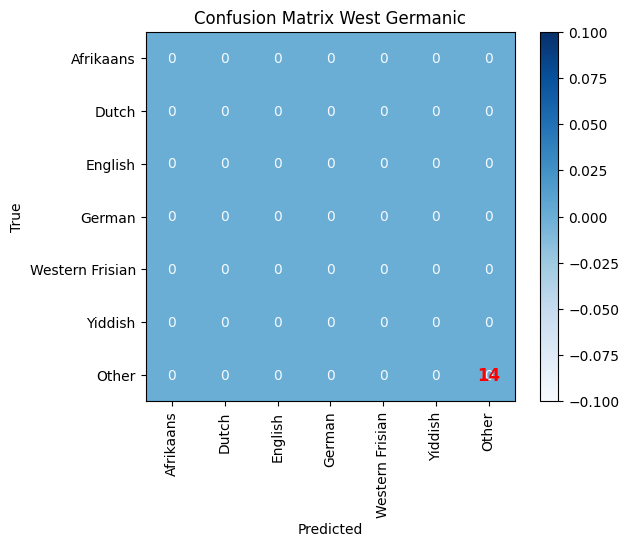

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


<Figure size 1000x800 with 0 Axes>

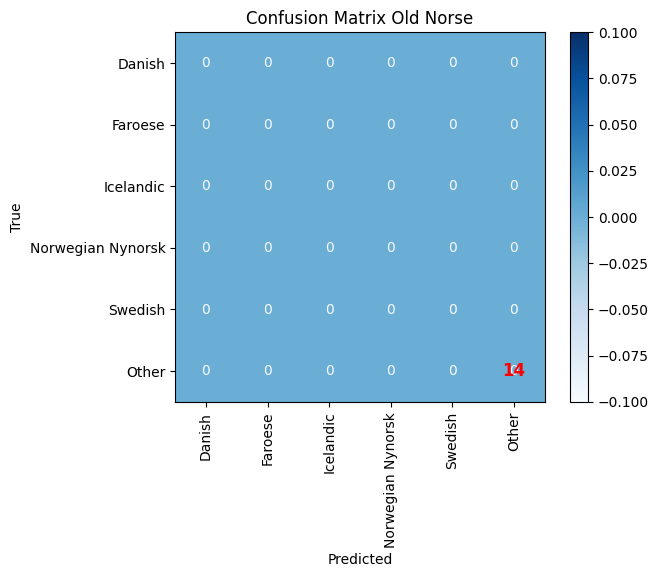

In [116]:
for language_group in language_groups:
    mapped_true_labels = [language_groups[language_group]['mapping_dict'][label] for label in true_labels]
    mapped_predicted_labels = [language_groups[language_group]['mapping_dict'][label] for label in predicted_labels]
    print(mapped_predicted_labels)
    languages = language_groups[language_group]['list']
    labels = np.arange(len(languages))

     # Compute the confusion matrix
    confusion = confusion_matrix(mapped_true_labels, mapped_predicted_labels, labels=np.arange(len(languages)))

    # Create a ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion, display_labels=languages)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f'Confusion Matrix {language_group}')
    plt.xticks(rotation=90)
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.show()



In [ ]:
for language_group in language_groups:
    mapped_true_labels = [language_groups[language_group]['mapping_dict'][label] for label in true_labels]
    mapped_predicted_labels = [language_groups[language_group]['mapping_dict'][label] for label in predicted_labels]
    print(mapped_predicted_labels)
    languages = language_groups[language_group]['list']
    languages = languages[:]
    languages.append('Other')
    labels = np.arange(len(languages))

    row_index_other = len(languages) - 1
    col_index_other = len(languages) - 1

     # Compute the confusion matrix
    confusion = confusion_matrix(mapped_true_labels, mapped_predicted_labels, labels=np.arange(len(languages)))

    confusion_modified = np.copy(confusion)
    confusion_modified[row_index_other, col_index_other] = 0

    # Create a ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_modified, display_labels=languages)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f'Confusion Matrix {language_group}')
    plt.xticks(rotation=90)
    plt.xlabel('Predicted')
    plt.ylabel('True')


    # Display the real number on top of the specific box
    plt.text(len(languages) -1, len(languages) -1, str(confusion[len(languages) -1, len(languages) -1]),
         ha='center', va='center', color='red', fontsize=12, fontweight='bold')


    plt.show()

